In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
import my_utils as mu
import torch
from torch import nn
from IPython import display

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F
transform1 = transforms.Compose([
          transforms.Resize((28, 28)),
          transforms.ToTensor()
          ])

train_iter2 = datasets.FashionMNIST('DATA_MNIST/', download=True, train=True, transform=transform1)
trainloader1 = torch.utils.data.DataLoader(train_iter2, batch_size=512, shuffle=True)

test_iter2 = datasets.FashionMNIST('DATA_MNIST/', download=True, train=False, transform=transform1)
testloader1 = torch.utils.data.DataLoader(test_iter2, batch_size=512, shuffle=True)

train_data_size = len(train_iter2)
test_data_size = len(test_iter2)

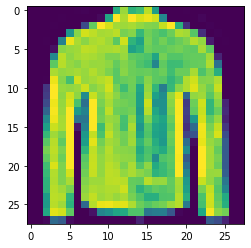

In [5]:
tensor_image1, index_label = test_iter2[50]
new_img1 = np.transpose(tensor_image1, (1,2,0)).reshape((28,28))
plt.imshow(new_img1)

Text(0.5, 1.0, 'distribution of pixels')

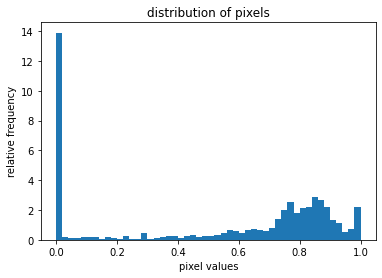

In [6]:
img_np1 = np.array(new_img1)
  
# plot the pixel values
plt.hist(img_np1.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [7]:
def mean_std(loader): #Calculating mean and standard deviation
  sum, squared_sum, num_batches = 0,0,0
  for data,_ in loader:
    sum += torch.mean(data,dim=[0,2,3])
    squared_sum += torch.mean(data**2,dim=[0,2,3])
    num_batches += 1
  mean = sum/num_batches
  std = (squared_sum/num_batches - mean**2)**0.5
  return mean, std

In [8]:
mean,std = mean_std(trainloader1)
print(mean)
print(std)

tensor([0.2861])
tensor([0.3530])


In [9]:
transform2 = transforms.Compose([ #Normalizing the data
          transforms.Resize((28, 28)),
          transforms.ToTensor(),
          transforms.Normalize((mean),(std))
          ])

train_iter1 = datasets.FashionMNIST('DATA_MNIST/', download=True, train=True, transform=transform2)
train_iter = torch.utils.data.DataLoader(train_iter1, batch_size=256, shuffle=True)

test_iter1 = datasets.FashionMNIST('DATA_MNIST/', download=True, train=False, transform=transform2)
test_iter = torch.utils.data.DataLoader(test_iter1, batch_size=256, shuffle=True)

train_data_size = len(train_iter)
test_data_size = len(test_iter)

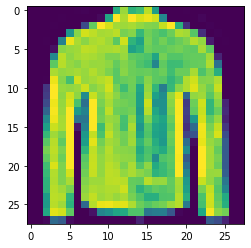

In [10]:
tensor_image2, index_label = test_iter1[50]
new_img2 = np.transpose(tensor_image2, (1,2,0)).reshape((28,28))
plt.imshow(new_img2)

Text(0.5, 1.0, 'distribution of pixels')

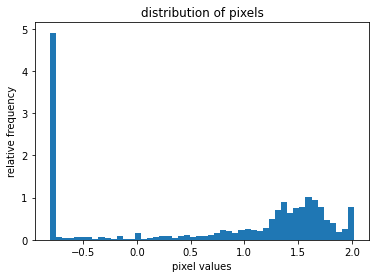

In [11]:
img_np2 = np.array(new_img2) #Pixels after normalizing the data
  
# plot the pixel values
plt.hist(img_np2.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [12]:
training_data = enumerate(train_iter)
batch_idx, (images, labels) = next(training_data)
print(images.shape) # Size of the image
print(labels.shape) # Size of the labels

torch.Size([256, 1, 28, 28])
torch.Size([256])


In [13]:
X, y = next(iter(train_iter)) # first batch
print(X.size())
print(y)

torch.Size([256, 1, 28, 28])
tensor([2, 5, 6, 3, 4, 4, 5, 5, 1, 9, 1, 1, 9, 5, 6, 6, 4, 8, 1, 4, 3, 7, 6, 2,
        1, 0, 1, 3, 2, 7, 7, 0, 6, 5, 4, 3, 3, 4, 3, 3, 8, 3, 1, 8, 7, 6, 6, 3,
        6, 2, 1, 8, 6, 3, 2, 5, 4, 9, 5, 0, 3, 3, 0, 8, 8, 1, 0, 9, 4, 8, 2, 0,
        1, 4, 8, 7, 8, 8, 9, 9, 9, 8, 3, 6, 0, 0, 5, 3, 0, 5, 6, 5, 8, 6, 0, 1,
        4, 7, 3, 3, 8, 6, 3, 1, 2, 3, 1, 5, 3, 2, 2, 4, 0, 3, 0, 6, 1, 0, 5, 8,
        5, 7, 8, 9, 3, 3, 8, 6, 3, 2, 9, 1, 8, 2, 1, 5, 2, 8, 9, 9, 1, 3, 8, 1,
        5, 2, 1, 1, 5, 8, 6, 9, 8, 3, 6, 4, 6, 0, 8, 2, 7, 5, 5, 7, 5, 1, 1, 6,
        0, 5, 6, 3, 8, 9, 8, 7, 2, 1, 7, 4, 3, 3, 4, 6, 7, 4, 3, 5, 4, 3, 0, 7,
        1, 5, 4, 1, 8, 2, 4, 9, 3, 9, 5, 7, 9, 9, 4, 2, 7, 1, 1, 5, 6, 4, 4, 2,
        4, 4, 5, 8, 8, 1, 1, 3, 3, 8, 8, 6, 6, 7, 1, 8, 2, 2, 8, 6, 5, 7, 4, 6,
        1, 9, 4, 8, 9, 5, 1, 4, 8, 5, 2, 9, 2, 8, 4, 6])


In [14]:
!pip install einops

In [15]:
import torch
a = torch.range(1, 16)
print(a)
a = a.view(4, 4)
print(a)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16.])
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  


In [16]:
from einops.einops import reduce
class Net(torch.nn.Module):
    def __init__(self, input_shape, hidden_d=49,num_outputs=10):
        super(Net, self).__init__()
        self.hidden_d=hidden_d

        #Stem of the model

        self.linear_mapper = nn.Linear(49, 49)

        #Backbone of the model

        self.layer1=nn.Sequential(
        nn.Linear(16, self.hidden_d),
        nn.ReLU(),
        nn.Linear(self.hidden_d,100)
        )

        self.layer2=nn.Sequential(
        nn.Linear(49, self.hidden_d),
        nn.ReLU(),
        nn.Linear(self.hidden_d,160) #Classifier of the model
        )
        
    def forward(self, images):
        # Dividing images into patches
        n, c, w, h = images.shape
        #Making Patches using unfold
        patches = images.unfold(2, 7, 7).unfold(3, 7, 7)
        #Vectorizing the patches using flatten
        patches = torch.flatten(patches, start_dim=4)
        #Stacking the patches using reshape
        patches = patches.reshape(patches.shape[0], 1, -1, 49)
        # Running linear layer for tokenization
        patches = patches.view(-1, 16,49) 
        tokens = self.linear_mapper(patches)
        tokens=torch.transpose(tokens,1,2) #Transpose of the patches
        out=self.layer1(tokens)
        out=torch.transpose(out,1,2)
        self.dropout=nn.Dropout(0.7) #Dropout after layer1
        out=self.layer2(out)
        self.dropout=nn.Dropout(0.7) #Dropout after layer2
        out=reduce(out, 'b  h w -> b w','mean')
        

        return out

In [17]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
net = Net((1, 28, 28), hidden_d=49, num_outputs=10)
net.apply(init_weights);

In [18]:
loss = nn.CrossEntropyLoss() # For Loss

In [19]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01) #Used adam optimizer

In [20]:
def accuracy(y_hat, y):  #y_hat is a matrix; 2nd dimension stores prediction scores for each class.
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # Predicted class is the index of max score         
    cmp = (y_hat.type(y.dtype) == y)  # because`==` is sensitive to data types
    return float(torch.sum(cmp)) # Taking the sum yields the number of correct predictions.

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
print(y.shape)
print(y_hat.shape)
accuracy(y_hat, y) / len(y)

torch.Size([2])
torch.Size([2, 3])


0.5

In [21]:
class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [22]:
def evaluate_accuracy(net, data_iter): 
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2)
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [23]:
def train_epoch_ch3(net, train_iter, loss, optimizer, batch_size=256, num_outputs=10):  
    """The training function for one epoch."""
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
    return metric[0] / metric[2], metric[1] / metric[2]

In [24]:
class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        if legend is None:
            legend = []
        mu.use_svg_display()
        self.fig, self.axes = mu.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        self.config_axes = lambda: mu.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [25]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer):  #save
    """Train a model."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    return (train_loss,train_acc,test_acc,num_epochs)

(0.24962555189927418, 0.9075, 0.8663, 50)

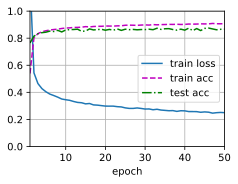

In [26]:
num_epochs = 50
train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)

Accuarcy of the model

In [27]:
evaluate_accuracy(net, test_iter)

0.8663